# Decision Trees
In this module, we will try yet another method of classification using a model called a Decision Tree. The idea behind a decision tree is also very simple. The decision tree continually splits the data into smaller groupings until a certain threshold is reached or all the points are classified. Let's explore in more depth how the decision tree works.

### Import Libraries
First, let's import our usual libraries as well as our load wine dataset.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

# The artificial data will be taken from sklearn (make_moons)
from sklearn.datasets import load_wine

data, target = load_wine(return_X_y=True, as_frame=True)

### Plot data
In the last module (K-Nearest Neighbors), we saw that we had found a method that was able to more accurately classify data with significant overlap (Magnesium vs. Non-Flavanoid Phenols). Now we will explore how well the Decision Tree can do on this dataset. First, let's start by plotting the data again. Again, we are longer doing binary classification and instead plotting all three classes.

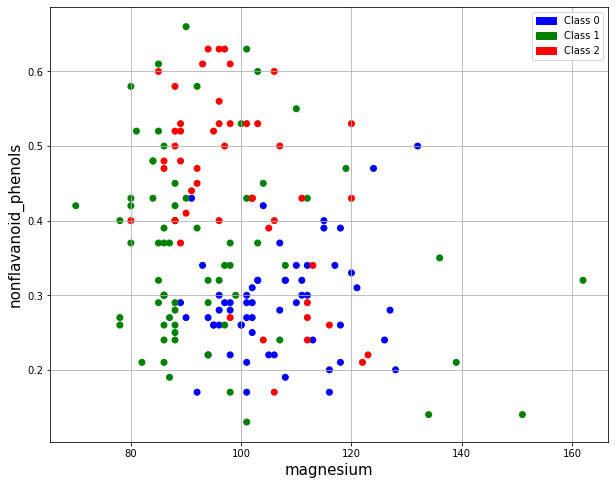

In [3]:
colors = ["red" if label == 2 else "green" if label == 1 else "blue" for label in target]
X = data[["magnesium",
          "nonflavanoid_phenols"]].to_numpy() 

y = target.to_numpy()
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c = colors)
plt.xlabel("magnesium", fontsize = 15)
plt.ylabel("nonflavanoid_phenols", fontsize = 15)

#Plot legend
import matplotlib.patches as mpatches
Class_0 = mpatches.Patch(color='blue', label='Class 0')
Class_1 = mpatches.Patch(color='green', label='Class 1')
Class_2 = mpatches.Patch(color='red', label='Class 2')
plt.legend(handles=[Class_0, Class_1, Class_2])
plt.grid(True)
plt.show()

### Split Data
As usual, let's split the data into training and testing data. We can also plot the training data. As we can see, there are significantly less points plotted, much as we'd expect when we split the data.

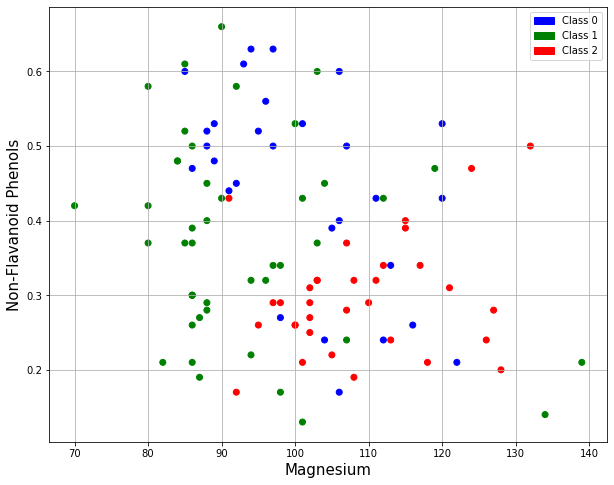

In [5]:
from sklearn.model_selection import train_test_split

#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    target,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["red" if label == 0 else "green" if label == 1 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "green" if label == 1 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Non-Flavanoid Phenols", fontsize = 15)

#Plot legend
import matplotlib.patches as mpatches
Class_0 = mpatches.Patch(color='blue', label='Class 0')
Class_1 = mpatches.Patch(color='green', label='Class 1')
Class_2 = mpatches.Patch(color='red', label='Class 2')
plt.legend(handles=[Class_0, Class_1, Class_2])
plt.grid(True)
plt.show()

### Import Decision Tree Classifier
We will be using the Decision Tree Classifier in Scikit-Learn to classify our data. For the decision tree classifier, we can set a max-depth, which means the number of times that the decision tree will split our data. We will start by splitting it five times. We also set the random-state, which just allows us to get repeatable results.

In [7]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

### Fit Data
Now let's use our classifier to fit the data.

In [8]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Visualize the Decision Tree
We can also visualize our decision tree. As we can see from the two decision trees below, the decision tree classifier will determine a point at which to split the data based on the two attributes. It will then continue to make these splits until we reach a depth of five and most of the data is in its respective category.

|--- Mag <= 90.50
|   |--- Non-Flav Phen <= 0.46
|   |   |--- class: 1
|   |--- Non-Flav Phen >  0.46
|   |   |--- Mag <= 85.50
|   |   |   |--- Non-Flav Phen <= 0.59
|   |   |   |   |--- class: 1
|   |   |   |--- Non-Flav Phen >  0.59
|   |   |   |   |--- Non-Flav Phen <= 0.61
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Non-Flav Phen >  0.61
|   |   |   |   |   |--- class: 1
|   |   |--- Mag >  85.50
|   |   |   |--- Mag <= 89.50
|   |   |   |   |--- Mag <= 87.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Mag >  87.00
|   |   |   |   |   |--- class: 2
|   |   |   |--- Mag >  89.50
|   |   |   |   |--- class: 1
|--- Mag >  90.50
|   |--- Non-Flav Phen <= 0.42
|   |   |--- Mag <= 99.00
|   |   |   |--- Non-Flav Phen <= 0.30
|   |   |   |   |--- Non-Flav Phen <= 0.24
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Non-Flav Phen >  0.24
|   |   |   |   |   |--- class: 0
|   |   |   |--- Non-Flav Phen >  0.30
|   |   |   |   |--- class: 1
|   |   |--- Mag >  9

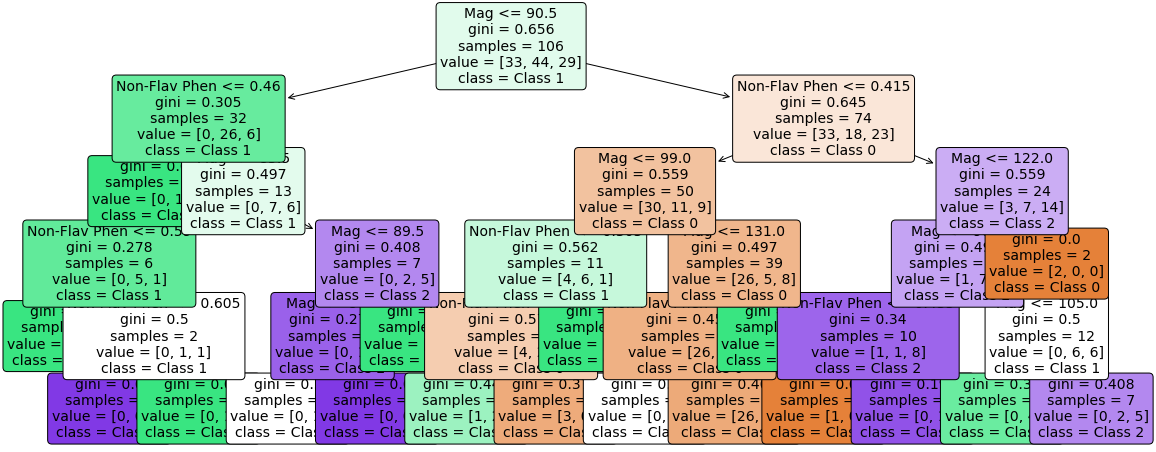

In [12]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["Mag", "Non-Flav Phen"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["Mag", "Non-Flav Phen"],
                   class_names = ["Class 0", "Class 1", "Class 2"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()
#gini: purity (1-P(B)^2)


### Plot Decision Regions
We can also plot the decision regions of our data to see how we did. From here, we can see the decision tree did pretty well in classifying our data! What's also interesting to note is how the decision tree classified our data. You can see that it splits our data in perpendicular lines. This means that if our data were to be rotated, we would get completely different regions, which is a little problematic.

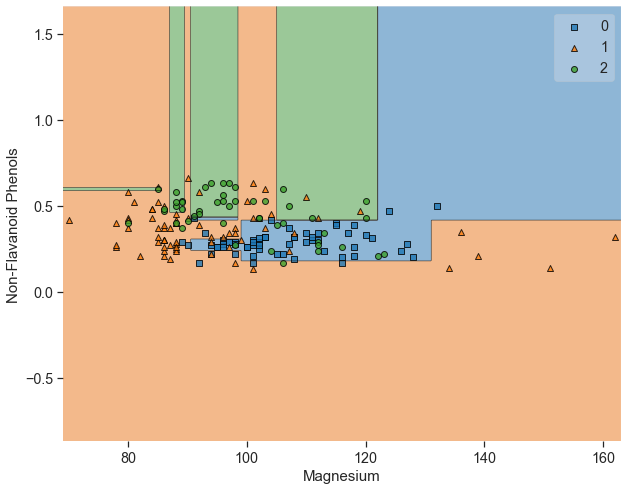

In [17]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Non-Flavanoid Phenols", fontsize = 15)
plt.grid()
plt.show()

### Plot Confusion Matrix
Let's plot the confusion matrix. We can see that our model classified most of our points correctly! 

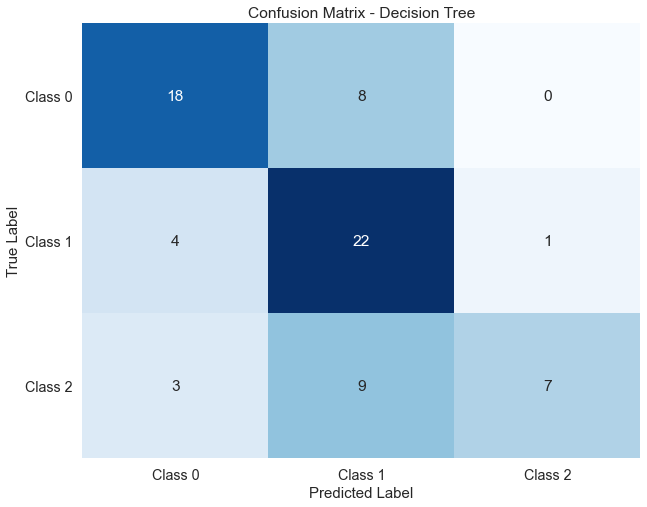

In [20]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "Blues", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["Class 0", "Class 1", "Class 2"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Class 0", "Class 1", "Class 2"], rotation=0)
plt.show()

### Display Classification Report
Of course, we can also display our classification report. When compared to that of K-Nearest Neighbors, although not significantly better, our results are more accurate, meaning that the Decision Tree is about as powerful as K-Nearest Neighbors, if not a little more.

In [21]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.56      0.81      0.67        27
           2       0.88      0.37      0.52        19

    accuracy                           0.65        72
   macro avg       0.72      0.63      0.63        72
weighted avg       0.70      0.65      0.64        72



### Testing Different Depths
One of the variables that we had arbitrarily set was the maximum depth that could be reached. Let's see what happens when we set different max depths. We will start with a super small depth of 1 and go to a maximum depth of 100. When we plot the decision regions for these depths, we can see that the classifications don't actually get much better as we have more depths and when compared to 10 and 100, the regions almost look the same. This is probably because as we increase in depth, we are only classifying smaller and smaller points that could be outliers.

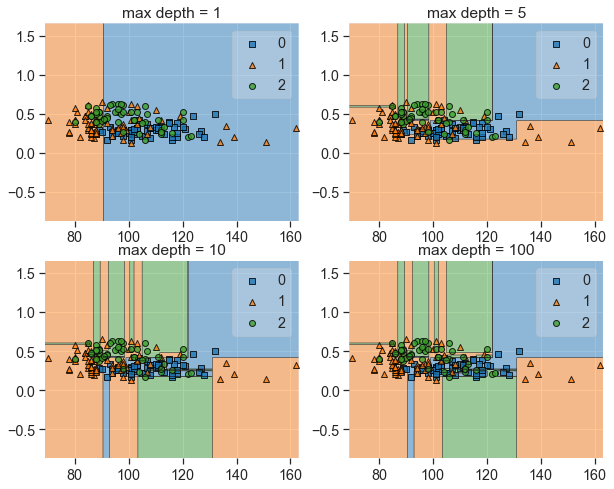

In [49]:
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))
max_depths = [1, 5, 10, 100]

for depth, grd in zip(max_depths,
                         itertools.product([0, 1], repeat=2)):
    decision_tree = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    decision_tree.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=decision_tree)
    plt.title(f'max depth = {depth}')

plt.show()

### Plot Classification Matrices
We can also plot the classification matrices. As we can see, up to a certain point, the classification matrices actually get worse as max depth increases. This really demonstrates that decision trees can be easily overfit if we aren't careful.

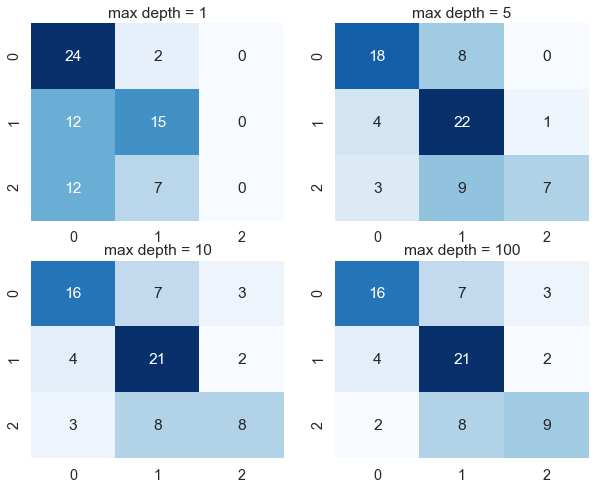

In [50]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))
max_depths = [1, 5, 10, 100]

for depth, grd in zip(max_depths,
                         itertools.product([0, 1], repeat=2)):
    decision_tree = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    decision_tree.fit(X_train, y_train)
    test_pred_decision_tree = decision_tree.predict(X_test)
    
    ax = plt.subplot(gs[grd[0], grd[1]])

    # The confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

    # Convert confusion matrix into dataframe
    matrix_df = pd.DataFrame(confusion_matrix)

    fig = sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "Blues", 
            cbar = False)
    plt.title(f'max depth = {depth}')

plt.show()

### Display Classification Reports
We can also display the classification reports for the various max depths to confirm our findings. From the classification reports, we can see that indeed out of the various depths, a max depth of five actually performed the best. While it may seem like the more depths we have, the better our data classification will be, this is actually incorrect. Too many depths will result in an overfitting of data.

In [52]:
max_depths = [1, 5, 10, 100]

for depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    
    print(f'max depth = {depth}')
    print(classification_report(y_test, y_pred))
    print()

max depth = 1
              precision    recall  f1-score   support

           0       0.50      0.92      0.65        26
           1       0.62      0.56      0.59        27
           2       0.00      0.00      0.00        19

    accuracy                           0.54        72
   macro avg       0.38      0.49      0.41        72
weighted avg       0.41      0.54      0.45        72


max depth = 5
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.56      0.81      0.67        27
           2       0.88      0.37      0.52        19

    accuracy                           0.65        72
   macro avg       0.72      0.63      0.63        72
weighted avg       0.70      0.65      0.64        72


max depth = 10
              precision    recall  f1-score   support

           0       0.70      0.62      0.65        26
           1       0.58      0.78      0.67        27
           2       0.62      0

C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Takeaways
As we can see from this module, Decision Trees are very effective at classification. However, there are a few problems with the decision tree model. First, the data is split based in an orthogonal manner, meaning that if the data were rotated, we would get a completely different decision tree. Second, decision trees are really prone to overfitting. Finally, for decision trees, outliers can be way more significant than they actually are. Especially with increasing depth, the decision tree will categorize outliers as their own category, which can be highly problematic. In order to combat some of these issues, we will explore a model that builds off of decision trees in the next module: Random Forests.

Potentially use decision trees for quality?